In [1]:
# import modules
import numpy as np
import matplotlib.pyplot as plt

<div class="alert alert-block alert-info">
    
## Exercise 7.1.1 Make a histogram of the uniform distribution

* create an array X of 1000 random numbers
* use `plt.hist(X)` to plot a histogram

See the [hist documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)

* make another histogram with 20 bins, using the `bins` argument.



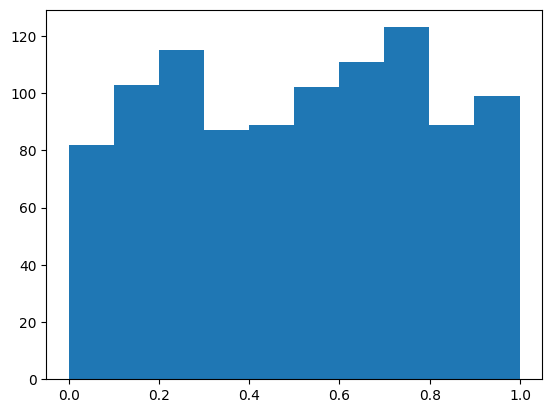

In [2]:
# solution
rng = np.random.default_rng()

x = rng.uniform(size=1000)
plt.hist(x)
plt.show()

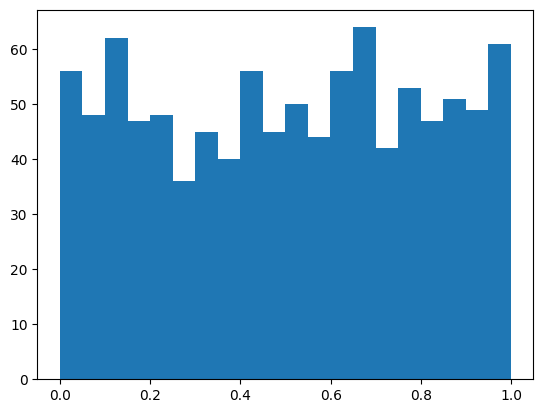

In [3]:
# solution
x = rng.uniform(size=1000)
plt.hist(x, bins=20)
plt.show()

<div class="alert alert-block alert-info">
    
## Exercise 7.1.2 Exponential and normal distributions

Now you can try other distributions.
* Create similar histograms for the [*normal*](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html) and [*exponential*](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.exponential.html) distribution.

Choose the number of random values and the number of bins for nice plots.



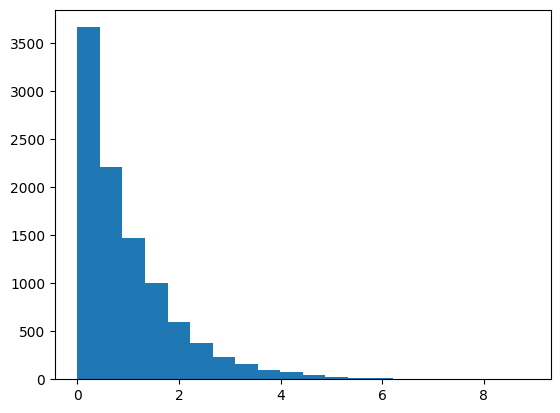

In [4]:
# solution
x = rng.exponential(size=10000)
plt.hist(x, bins=20)
plt.show()

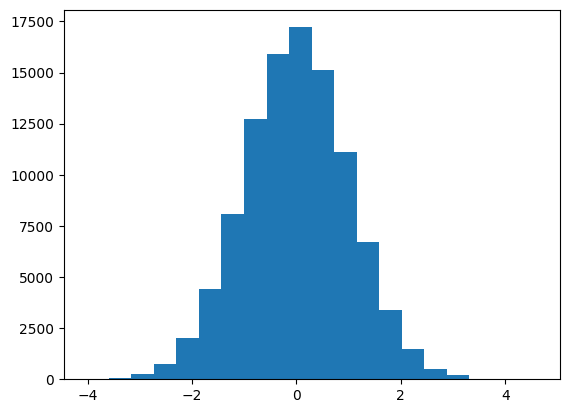

In [5]:
# solution
x = rng.normal(size=100000)
plt.hist(x, bins=20)
plt.show()

<div class="alert alert-block alert-info">
    
## Exercise 7.1.3 Rolling multiple dice

With `rng.integers(low, high, size`) ([documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.integers.html))
you can generate integers, to simulate rolling dice.

* Use this function to make a histogram of the outcome of rolling a normal six-sided die.
  Hint: as with Python ranges, the low argument is inclusive, the high argument is exclusive.

* Now do the same for the sum of M dice, for M = 2, 3, ...
  Hint: for N rolls of M dice, an easy way is to generate an N by M array of die results, and then summing this array over the M-direction.
  You need the `np.sum` function ([documentation](https://numpy.org/doc/stable/reference/generated/numpy.sum.html#numpy.sum))
  and the axis ardument to select which direction to sum over.
  Hint 2: for the plot to look nice, you need to set the bins. The most robust is to ask for every integer to be its own bin, using bins=range(1,6*M)

Notice that if you make M large, the distribution starts looking like the normal distribution you plotted above. This is known as the *Central Limit Theorem*.
  

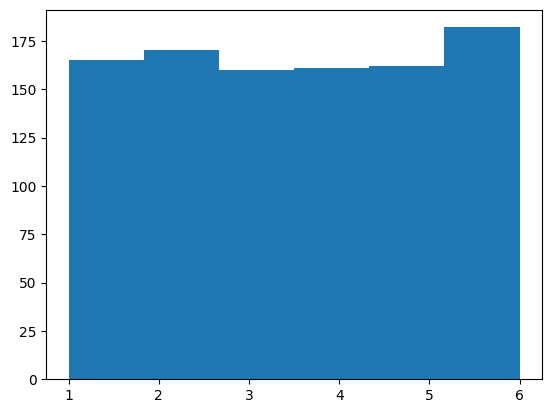

In [6]:
# solution
d = rng.integers(low=1, high=7, size=1000)
plt.hist(d, bins=6)
plt.show()

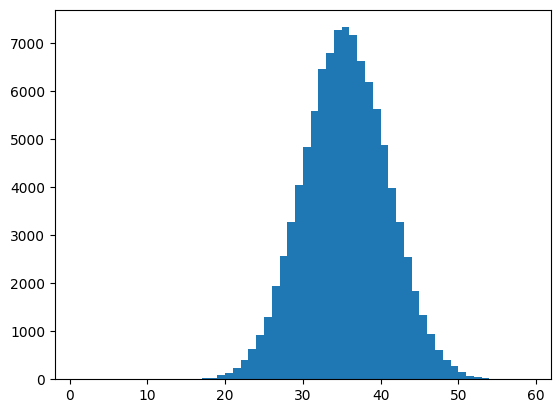

In [7]:
# solution
M=10
d = rng.integers(low=1, high=7, size=(100000,M))
s = np.sum(d,axis=1)
plt.hist(s, bins=range(1,6*M))
plt.show()

In [8]:
# pendulum simulator - you don't need to change this

def pendulum(a, v=0, l=1, g=9.81, dt=0.01, t_end=7):
    """
    a:     initial angle (radians)
    v:     initial angular velocity (radians/s)
    l:     length of the pendulum (m)
    g:     gravitational acceleration (m/s**2)
    dt:    length of time step (s)
    t_end: end time of simulation (s)
    
    returns 3 arrays:
    T: times
    A: angle as function of time
    V: angular velocity as function of time
    """
    T = []
    A = []
    V = []
    t = 0
    while t < t_end:
        a += v * dt                # update angle with angular velocity
        v += -g/l * np.sin(a) * dt # update angular velocity with the force
        t += dt                    # update time
        
        T.append(t)                # collect output quantities
        A.append(a)
        V.append(v)
    return T, A, V


<div class="alert alert-block alert-info">
    
## Exercise 7.2.1 Simulating a pendulum
    
* use the pendulum function above to simulate a pendulum with different initial angles. Plot the result.
  The angle is measured in radians, so half a turn is $\pi$ radians.
  You should see that for small initial angles the result is sine-shaped, a well-known result in physics because the equations can be simplified when the angle is small. What happens for larger angles?

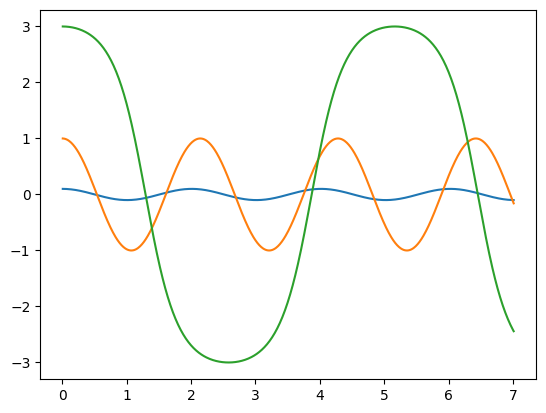

In [9]:
# solution
T1,A1,V1 = pendulum(a=.1)
T2,A2,V2 = pendulum(a=1)
T3,A3,V3 = pendulum(a=3)

plt.plot(T1,A1)
plt.plot(T2,A2)
plt.plot(T3,A3)
plt.show()

<div class="alert alert-block alert-info">
    
## Exercise 7.3.1 An iterative map
    
Doctor M. studies the following sequence:
    $$z_0 = 0$$
    $$z_n = z_{n-1}^2 + c$$
where $z$ and $c$ are complex numbers.
    
For some values of $c$, the sequence remains bounded, while for others the magnitude of $z$ grows larger and larger.
Write a function to test a value of $c$ and determine the behavior of the sequence.
    
**Input**: Your function should take two parameters: c and a maximum number of iterations.
If the value of $|z$ is ever larger than 2, it is known that $|z|$ will grow large, and you can stop iterating.
**Output**: The function should return the number of iterations needed until $|z| > 2$, or 0 if $|z|$ remains bounded.

**Hint 1:** c will be a complex number, but since this is Python you don't need to worry much, normal math will just work. But remember `abs()` for $|z|$.
    
**Hint 2:** you don't need to save all the $z_n$.
  You can use a single z, and update it each iteration.

In [10]:
# solution
def M(c, Nmax):
    z = 0
    n = 0
    while abs(z) < 2 and n < Nmax:
        z = z**2 + c
        n += 1

    if n == Nmax:
        return 0
    return n

<div class="alert alert-block alert-info">
    
## Exercise 7.3.2 Plot M
    
Use Nmax = 100, and make a plot of M in the complex plane.
    
    

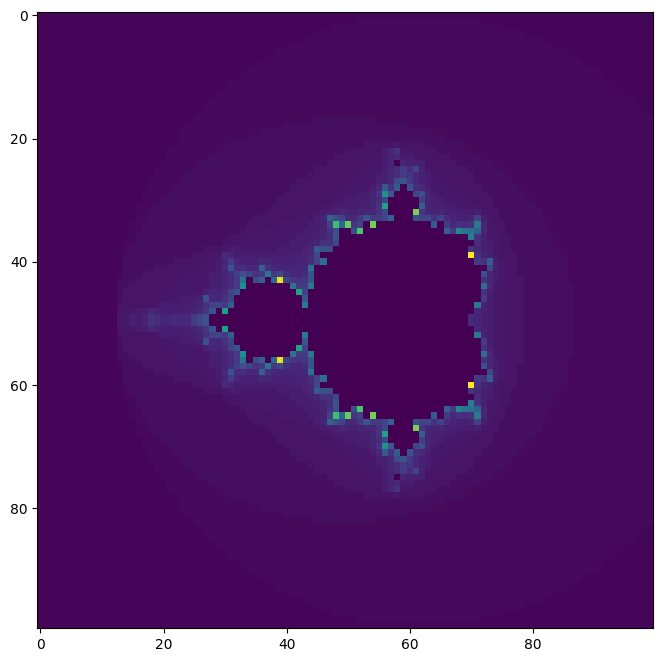

In [11]:
# solution
plt.figure(figsize=(8,8))
X = np.linspace(-2.5,1.5, 100)
Y = np.linspace(-2,2, 100)
Nmax = 100
N = np.zeros((len(Y), len(X)))
for j in range(len(Y)):
    for i in range(len(X)):
        c = X[i] + 1j * Y[j]
        N[j][i] = M(c, Nmax)
        
plt.imshow(N)
